# Task 1: perceptron

11812804 董正

In [20]:
from perceptron import Perceptron

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

SEED = 24

In [21]:
DIM = 2
MAX_EPOCHS = 2000
LR = 0.01
NUM_POINTS = 200

## Case 1

Normal case.

In [22]:
mu1, mu2, sigma1, sigma2 = 0, 10, 4, 4

p = Perceptron(DIM, MAX_EPOCHS, LR)

x, y = p.gen_dataset(NUM_POINTS, mu1, sigma1, mu2, sigma2)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=SEED)

p.train(x_train, y_train, verbose=100, save_best=True)

Train set shape (320, 2)
2022-02-27 10:54:28.628071 Epoch 100 Train Loss = 5.084
2022-02-27 10:54:28.702870 Epoch 200 Train Loss = 7.159
2022-02-27 10:54:28.773682 Epoch 300 Train Loss = 5.765
2022-02-27 10:54:28.849479 Epoch 400 Train Loss = 6.236
2022-02-27 10:54:28.912312 Epoch 500 Train Loss = 5.558
2022-02-27 10:54:28.982167 Epoch 600 Train Loss = 5.867
2022-02-27 10:54:29.051939 Epoch 700 Train Loss = 6.252
2022-02-27 10:54:29.120282 Epoch 800 Train Loss = 7.312
2022-02-27 10:54:29.186151 Epoch 900 Train Loss = 5.894
2022-02-27 10:54:29.257914 Epoch 1000 Train Loss = 6.637
2022-02-27 10:54:29.328766 Epoch 1100 Train Loss = 7.005
2022-02-27 10:54:29.390559 Epoch 1200 Train Loss = 6.080
2022-02-27 10:54:29.454790 Epoch 1300 Train Loss = 7.201
2022-02-27 10:54:29.530065 Epoch 1400 Train Loss = 6.810
2022-02-27 10:54:29.591901 Epoch 1500 Train Loss = 6.571
2022-02-27 10:54:29.664706 Epoch 1600 Train Loss = 6.302
2022-02-27 10:54:29.731569 Epoch 1700 Train Loss = 7.270
2022-02-27 10:5

In [23]:
y_pred = p.forward(x_test)

print("accuracy = %.3f" % metrics.accuracy_score(y_test, y_pred))
print("precision = %.3f" % metrics.precision_score(y_test, y_pred))
print("recall = %.3f" % metrics.recall_score(y_test, y_pred))
print("f1 = %.3f" % metrics.f1_score(y_test, y_pred))

Test set shape (80, 2)
accuracy = 0.988
precision = 1.000
recall = 0.977
f1 = 0.989


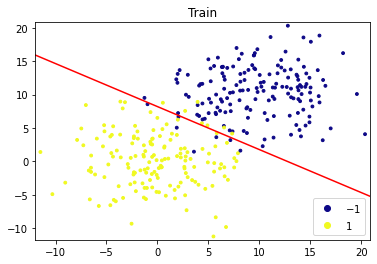

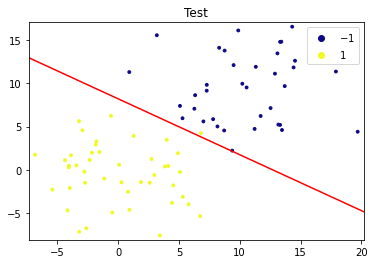

In [24]:
points = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=8, cmap="plasma")
x_plot = np.linspace(-1000, 1000, 100)
y_plot = (-p.w[0] * x_plot - p.b) / p.w[1]
plt.xlim(np.min(x_train[:, 0]) - 0.5, np.max(x_train[:, 0]) + 0.5)
plt.ylim(np.min(x_train[:, 1]) - 0.5, np.max(x_train[:, 1]) + 0.5)
plt.legend(*points.legend_elements())
plt.title("Train")
plt.plot(x_plot, y_plot, c="red")
plt.show();

points = plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=8, cmap="plasma")
x_plot = np.linspace(-1000, 1000, 100)
y_plot = (-p.w[0] * x_plot - p.b) / p.w[1]
plt.xlim(np.min(x_test[:, 0]) - 0.5, np.max(x_test[:, 0]) + 0.5)
plt.ylim(np.min(x_test[:, 1]) - 0.5, np.max(x_test[:, 1]) + 0.5)
plt.legend(*points.legend_elements())
plt.title("Test")
plt.plot(x_plot, y_plot, c="red")
plt.show();

## Case 2

The means of the two Gaussians are too close.

Here we set both of their average values as 0.

In [25]:
mu1, mu2, sigma1, sigma2 = 0, 0, 0.5, 1

p = Perceptron(DIM, MAX_EPOCHS, LR)

x, y = p.gen_dataset(NUM_POINTS, mu1, sigma1, mu2, sigma2)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=SEED)

p.train(x_train, y_train, verbose=100, save_best=True)

Train set shape (320, 2)
2022-02-27 10:54:30.754413 Epoch 100 Train Loss = 1.847
2022-02-27 10:54:30.955710 Epoch 200 Train Loss = 1.922
2022-02-27 10:54:31.105270 Epoch 300 Train Loss = 1.643
2022-02-27 10:54:31.257738 Epoch 400 Train Loss = 1.781
2022-02-27 10:54:31.396367 Epoch 500 Train Loss = 2.032
2022-02-27 10:54:31.591847 Epoch 600 Train Loss = 1.753
2022-02-27 10:54:31.738478 Epoch 700 Train Loss = 1.912
2022-02-27 10:54:31.861126 Epoch 800 Train Loss = 1.848
2022-02-27 10:54:31.987830 Epoch 900 Train Loss = 1.784
2022-02-27 10:54:32.116443 Epoch 1000 Train Loss = 1.443
2022-02-27 10:54:32.254080 Epoch 1100 Train Loss = 1.894
2022-02-27 10:54:32.382439 Epoch 1200 Train Loss = 1.936
2022-02-27 10:54:32.512135 Epoch 1300 Train Loss = 1.655
2022-02-27 10:54:32.637595 Epoch 1400 Train Loss = 1.608
2022-02-27 10:54:32.765288 Epoch 1500 Train Loss = 1.901
2022-02-27 10:54:32.894950 Epoch 1600 Train Loss = 1.677
2022-02-27 10:54:33.024602 Epoch 1700 Train Loss = 1.855
2022-02-27 10:5

In [26]:
y_pred = p.forward(x_test)

print("accuracy = %.3f" % metrics.accuracy_score(y_test, y_pred))
print("precision = %.3f" % metrics.precision_score(y_test, y_pred))
print("recall = %.3f" % metrics.recall_score(y_test, y_pred))
print("f1 = %.3f" % metrics.f1_score(y_test, y_pred))

Test set shape (80, 2)
accuracy = 0.537
precision = 0.595
recall = 0.500
f1 = 0.543


Accuracy is around 0.5.

From the figure below we can see that the perceptron cannot classify them well because their average are too close, probably any line that passes $(0, 0)$ can acheive 0.5 accuracy.

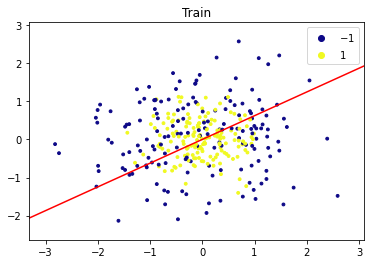

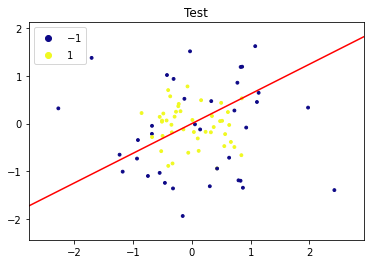

In [27]:
points = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=8, cmap="plasma")
x_plot = np.linspace(-1000, 1000, 100)
y_plot = (-p.w[0] * x_plot - p.b) / p.w[1]
plt.xlim(np.min(x_train[:, 0]) - 0.5, np.max(x_train[:, 0]) + 0.5)
plt.ylim(np.min(x_train[:, 1]) - 0.5, np.max(x_train[:, 1]) + 0.5)
plt.legend(*points.legend_elements())
plt.title("Train")
plt.plot(x_plot, y_plot, c="red")
plt.show();

points = plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=8, cmap="plasma")
x_plot = np.linspace(-1000, 1000, 100)
y_plot = (-p.w[0] * x_plot - p.b) / p.w[1]
plt.xlim(np.min(x_test[:, 0]) - 0.5, np.max(x_test[:, 0]) + 0.5)
plt.ylim(np.min(x_test[:, 1]) - 0.5, np.max(x_test[:, 1]) + 0.5)
plt.legend(*points.legend_elements())
plt.title("Test")
plt.plot(x_plot, y_plot, c="red")
plt.show();

## Case 3

Variance is too high.

In [31]:
mu1, mu2, sigma1, sigma2 = 0, 10, 20, 20

p = Perceptron(DIM, MAX_EPOCHS, LR)

x, y = p.gen_dataset(NUM_POINTS, mu1, sigma1, mu2, sigma2)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=SEED)

p.train(x_train, y_train, verbose=100, save_best=True)

Train set shape (320, 2)
2022-02-27 10:55:44.703608 Epoch 100 Train Loss = 598.613
2022-02-27 10:55:44.884127 Epoch 200 Train Loss = 670.346
2022-02-27 10:55:45.029737 Epoch 300 Train Loss = 540.464
2022-02-27 10:55:45.168367 Epoch 400 Train Loss = 568.448
2022-02-27 10:55:45.295069 Epoch 500 Train Loss = 630.239
2022-02-27 10:55:45.454073 Epoch 600 Train Loss = 670.558
2022-02-27 10:55:45.593127 Epoch 700 Train Loss = 693.276
2022-02-27 10:55:45.711813 Epoch 800 Train Loss = 613.807
2022-02-27 10:55:45.852437 Epoch 900 Train Loss = 606.637
2022-02-27 10:55:45.989513 Epoch 1000 Train Loss = 602.534
2022-02-27 10:55:46.110231 Epoch 1100 Train Loss = 644.032
2022-02-27 10:55:46.274793 Epoch 1200 Train Loss = 649.292
2022-02-27 10:55:46.395428 Epoch 1300 Train Loss = 624.344
2022-02-27 10:55:46.518590 Epoch 1400 Train Loss = 577.751
2022-02-27 10:55:46.651202 Epoch 1500 Train Loss = 645.132
2022-02-27 10:55:46.782849 Epoch 1600 Train Loss = 555.100
2022-02-27 10:55:46.909554 Epoch 1700 Tr

In [32]:
y_pred = p.forward(x_test)

print("accuracy = %.3f" % metrics.accuracy_score(y_test, y_pred))
print("precision = %.3f" % metrics.precision_score(y_test, y_pred))
print("recall = %.3f" % metrics.recall_score(y_test, y_pred))
print("f1 = %.3f" % metrics.f1_score(y_test, y_pred))

Test set shape (80, 2)
accuracy = 0.463
precision = 0.512
recall = 0.500
f1 = 0.506


Because the variance is high, all the points are mixed together. Therefore, they are unclassifiable, which is similar to Case 2.

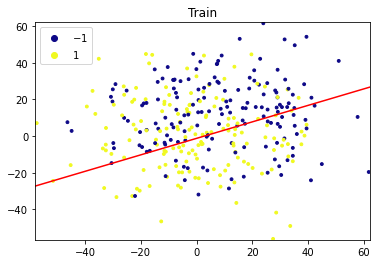

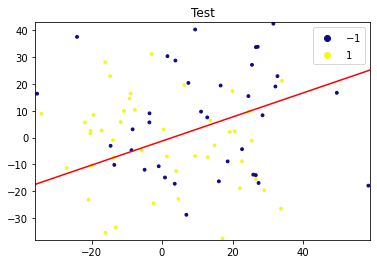

In [35]:
points = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=8, cmap="plasma")
x_plot = np.linspace(-1000, 1000, 100)
y_plot = (-p.w[0] * x_plot - p.b) / p.w[1]
plt.xlim(np.min(x_train[:, 0]) - 0.5, np.max(x_train[:, 0]) + 0.5)
plt.ylim(np.min(x_train[:, 1]) - 0.5, np.max(x_train[:, 1]) + 0.5)
plt.legend(*points.legend_elements())
plt.title("Train")
plt.plot(x_plot, y_plot, c="red")
plt.show();

points = plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=8, cmap="plasma")
x_plot = np.linspace(-1000, 1000, 100)
y_plot = (-p.w[0] * x_plot - p.b) / p.w[1]
plt.xlim(np.min(x_test[:, 0]) - 0.5, np.max(x_test[:, 0]) + 0.5)
plt.ylim(np.min(x_test[:, 1]) - 0.5, np.max(x_test[:, 1]) + 0.5)
plt.legend(*points.legend_elements())
plt.title("Test")
plt.plot(x_plot, y_plot, c="red")
plt.show();